# Run motion analyses on ADHD data

In [1]:
%matplotlib inline
import pandas as pd
from nilearn import datasets

from ddmra import run_analyses, utils

/opt/miniconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
%%time
# Constants
n_subjects = 10  # 31
qc_thresh = 0.2
data = datasets.fetch_adhd(n_subjects=n_subjects)
n_iters = 100

# Prepare data
imgs = []
fd_all = []
for i in range(n_subjects):
    func = data.func[i]
    imgs.append(func)
    conf = data.confounds[i]
    df = pd.read_table(conf)
    motion = df[['motion-pitch', 'motion-roll', 'motion-yaw',
                 'motion-x', 'motion-y', 'motion-z']].values
    fd_all.append(utils.get_fd_power(
        motion, order=['p', 'r', 'ya', 'x', 'y', 'z'], unit='deg'))

CPU times: user 41.5 ms, sys: 6.8 ms, total: 48.3 ms
Wall time: 55.6 ms


/opt/miniconda3/lib/python3.8/site-packages/nilearn/datasets/func.py:458: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  phenotypic = np.genfromtxt(phenotypic, names=True, delimiter=',',


CPU times: user 3min 23s, sys: 25.2 s, total: 3min 48s
Wall time: 1min 49s


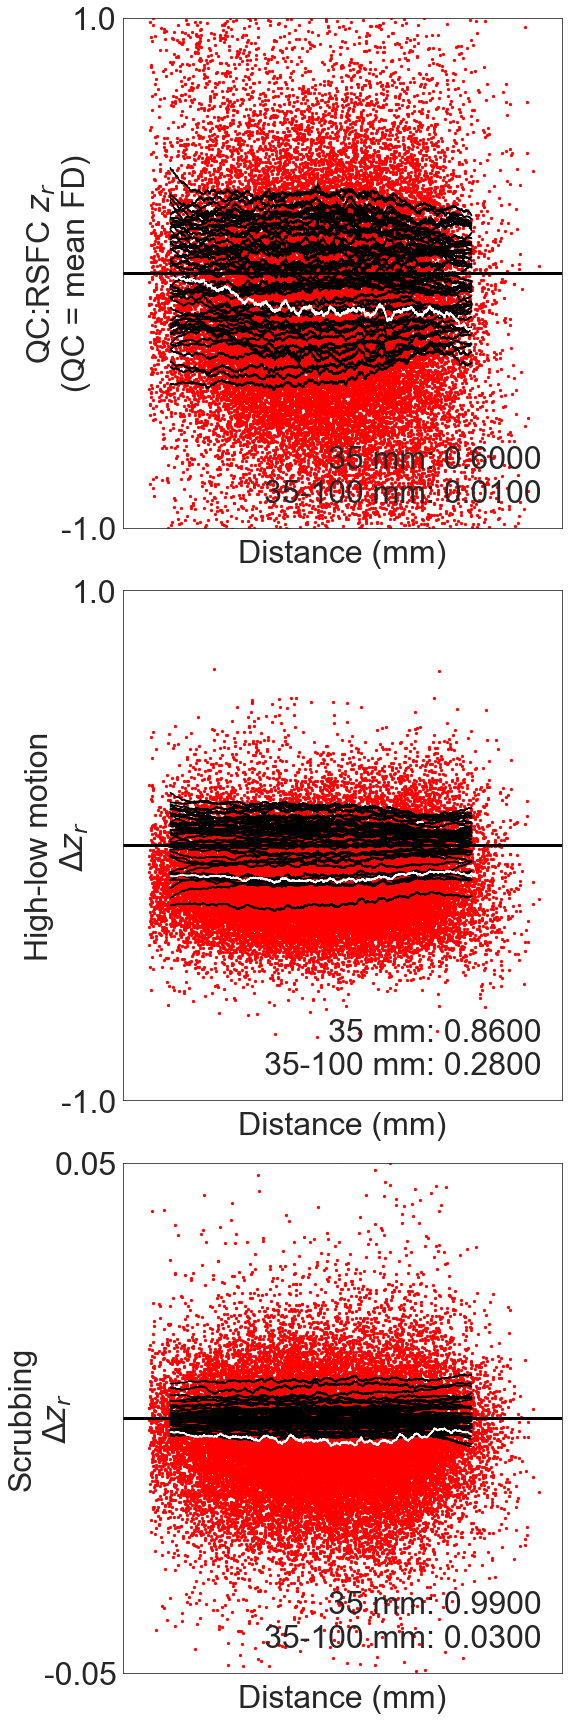

In [3]:
%%time
run_analyses(imgs, fd_all, out_dir='results/', n_iters=n_iters, n_jobs=2, qc_thresh=qc_thresh)